## Multiple Linear Regression

#### What is Linear Regression?
- Linear Regression is a powerful statistical analytical method that allows us to examine the relationship between two or more variables of interest, the relationship between independent and dependent variables.
- Linear Regression examines the effects of one or more independent variables on a dependent variable.
- Linear regression is a supervised learning algorithm.
- Applications of Linear Regression range from predicting health outcomes in medicine, stock prices in finance, power usage in high-performance computing, marketing effectiveness on pricing and promotions and sales of a products.


#### Format of Linear Regression formula

- In Multiple Linear Regression, a Multiple independent variables(x1,x2,x3,...xn) are used to predict the value of a single dependent variable(y)

![Regression Formula](pics/MLRFormula.png)


#### The Goal
The goal of this lab is to predict the sales price for all new houses getting build.

#### About the "HousePrices" dataset
The House Prices dataset contains 100 observations and 5 different attributes (4 independent variables and 1 dependent variable)

#### Independent Variables
    1. House Sqft – square footage of the property (X1)
    2. Taxes - property tax will be calculated on this value (X2)
    3. Bedrooms – number of bedrooms in the property (X3)
    4. Bathrooms – number of bathrooms in the property (X4)

#### Dependent Variable
    5. Last Sold Price - the value the property got sold for(Y)

#### Download and Install Python Libraries

In [68]:
#!pip install pandas
#!pip install numpy
#!pip install scikit-learn
#!pip install scipy
#!pip install seaborn
#!pip install matplotlib

#### Import Python Libraries

In [69]:
# Importing some common libraries that’s needed for all data science related projects
import numpy as np
import pandas as pd
import math
import scipy


# Importing different modules from the sklearn library to build and evaluate the linear regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Importing matplotlib and seaborn libraries for data visualisation 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Switching off unnecessary warning messages 
import warnings
warnings.filterwarnings('ignore')





#### Process map
Below illustrates a 14-step process used during this lab.

    1.	Import Data
    2.	Data Quality Checks
    3.	Data Cleansing
    4.	Exploratory Analysis using Aggregations
    5.	Exploratory Analysis using Distributions
    6.	Exploratory Analysis using Correlations
    7.	Visualisations
    8.	Model: Pre-processing
    9.	Model: Train/Test Split
    10.	Model: Build (Train dataset)
    11.	Model: Evaluation (Train dataset)
    12.	Model: Evaluation (Test dataset)
    13.	Model: Predictions
    14.	Model: Save Predictions


#### 1. Import Data

In [70]:
# Reading data from a CSV file and saving that data into a dataframe called "df"

df = pd.read_csv("HousePrices.csv")
df

,HouseSqft,Taxes,Bedrooms,Bathrooms,LastSoldPrice
0,1240.0,1360,3,2.0,145000
1,370.0,1050,1,1.0,68000
2,NaN,1010,3,1.5,115000
3,1120.0,830,3,2.0,69000
4,1710.0,2150,3,2.0,163000
...,...,...,...,...,...
95,1060.0,990,2,2.0,176000
96,1730.0,3030,3,2.0,196500
97,1370.0,1580,3,2.0,132200
98,1560.0,1770,3,2.0,88400


#### 2. Data Quality Checks

    2.1 Check data
    2.2 Check shape of data
    2.3 Check for duplicates
    2.4 Check for missing values

In [71]:
# 2.1
# Viewing top 5 records
df.head()

# Viewing last 5 records
#df.tail()

# Viewing top 3 records
#df.head(n=3)

# Viewing last 3 records
#df.tail(n=3)

,HouseSqft,Taxes,Bedrooms,Bathrooms,LastSoldPrice
0,1240.0,1360,3,2.0,145000
1,370.0,1050,1,1.0,68000
2,NaN,1010,3,1.5,115000
3,1120.0,830,3,2.0,69000
4,1710.0,2150,3,2.0,163000


In [72]:
# 2.2
# Looking at the structure of the dataframe

df.shape

(100, 5)

In [73]:
# 2.3
# Let’s use duplicated() function to identify how many duplicate records there are in the dataset

df.duplicated().sum()

0

In [74]:
# 2.4
# This method prints out information about a dataFrame including the index, dtype, columns, non-null values and memory usage
# This method is also useful for finding out missing values in a dataset
# if found, we can use interpolation techniques to rectify those missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HouseSqft      98 non-null     float64
 1   Taxes          100 non-null    int64  
 2   Bedrooms       100 non-null    int64  
 3   Bathrooms      100 non-null    float64
 4   LastSoldPrice  100 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 4.0 KB


#### 3. Data Cleansing

    3.1 Converting data types
    3.2 Remove duplicates
    3.3 Fill missing values
    3.4 Outlier detection and treatment

In [75]:
# 3.1
# Converting data type of a column using astype() method

df["HouseSqft"] = df.HouseSqft.astype("float64")
df["Taxes"] = df.Taxes.astype("float64")
df["Bedrooms"] = df.Bedrooms.astype("category")
df["Bathrooms"] = df.Bathrooms.astype("category")
df["LastSoldPrice"] = df.LastSoldPrice.astype("int64")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   HouseSqft      98 non-null     float64 
 1   Taxes          100 non-null    float64 
 2   Bedrooms       100 non-null    category
 3   Bathrooms      100 non-null    category
 4   LastSoldPrice  100 non-null    int64   
dtypes: category(2), float64(2), int64(1)
memory usage: 3.1 KB


In [76]:
# 3.2
# This is how you remove all the duplicates from the dataset using drop_duplicates() function

df = df.drop_duplicates()

In [77]:
# 3.3
# Fill missing values (NaN, Null) with median value of a column

In [78]:
# This is how you calculate median for all columns in the dataframe
df.median()

HouseSqft          1415.0
Taxes              1535.0
LastSoldPrice    123750.0
dtype: float64

In [79]:
# This is how you calculate median value for a specific column
df.HouseSqft.median()

1415.0

In [80]:
# This is how you fix missing values for all columns
# df = df.fillna(df.median())

In [81]:
# This is how you fix a missing value for a specific column
df.HouseSqft = df.HouseSqft.fillna(df.HouseSqft.median())
df

,HouseSqft,Taxes,Bedrooms,Bathrooms,LastSoldPrice
0,1240.0,1360.0,3,2.0,145000
1,370.0,1050.0,1,1.0,68000
2,1415.0,1010.0,3,1.5,115000
3,1120.0,830.0,3,2.0,69000
4,1710.0,2150.0,3,2.0,163000
...,...,...,...,...,...
95,1060.0,990.0,2,2.0,176000
96,1730.0,3030.0,3,2.0,196500
97,1370.0,1580.0,3,2.0,132200
98,1560.0,1770.0,3,2.0,88400


In [82]:
# By looking at the info it is clear all the missing values are correctly replaced with median value
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   HouseSqft      100 non-null    float64 
 1   Taxes          100 non-null    float64 
 2   Bedrooms       100 non-null    category
 3   Bathrooms      100 non-null    category
 4   LastSoldPrice  100 non-null    int64   
dtypes: category(2), float64(2), int64(1)
memory usage: 3.7 KB


#### 3.4
#### Outlier Detection and Treatment
- One of the most important step in data cleansing is outlier detection and treatment.
- Outliers are defined as data points that are significantly different from the remaining data. Those are points that lie outside the overall pattern of the distribution. Statistical measures such as mean, variance and correlation are very susceptible to outliers.

#### Outlier Detection
- This can be done through visualising the data (Box and whisker plot)


#### Outlier Treatment
- This can be done by imputing mean/median or random value in place of an outlier

![boxplot](pics/boxplot1.png)

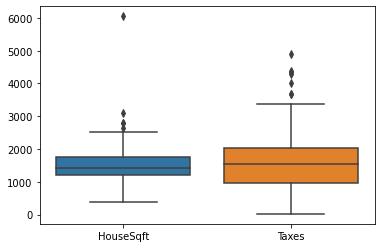

In [83]:
# Outlier detection using boxplot from seaborn library

sns.boxplot(data=df[["HouseSqft","Taxes"]])
plt.show()

In [84]:
# Outlier treatment
# Calculation of Q1, Q3, IQR for "HouseSqft" column:

q1 = np.percentile(df.HouseSqft,[25])[0]
q3 = np.percentile(df.HouseSqft,[75])[0]
iqr = q3-q1

ll = q1 - iqr*1.5 #lower limit
ul = q3 + iqr*1.5 #upper limit

print(ll)
print(ul)

341.25
2611.25


In [85]:
# Option1 - Detecting outliers and imputing with custom values

df.HouseSqft[df.HouseSqft>ul] = ul
df.HouseSqft[df.HouseSqft<ll] = ll
df

,HouseSqft,Taxes,Bedrooms,Bathrooms,LastSoldPrice
0,1240.0,1360.0,3,2.0,145000
1,370.0,1050.0,1,1.0,68000
2,1415.0,1010.0,3,1.5,115000
3,1120.0,830.0,3,2.0,69000
4,1710.0,2150.0,3,2.0,163000
...,...,...,...,...,...
95,1060.0,990.0,2,2.0,176000
96,1730.0,3030.0,3,2.0,196500
97,1370.0,1580.0,3,2.0,132200
98,1560.0,1770.0,3,2.0,88400


In [86]:
# Please note the dataset contains 100 records after imputing outliers
df.shape

(100, 5)

In [87]:
# Option2 - Filtering out outliers from the dataset
# Please note the dataset only contains 95 records, 5 records are treated as outliers

# df = df.loc[(df.HouseSqft<=ul) & (df.HouseSqft>=ll) , ["HouseSqft","Taxes", "Bedrooms","Bathrooms","LastSoldPrice"]]

# This code below can also create the same output as above
# By omitting column section, we can display all columns
# df.loc[(df.HouseSqft<=ul) | (df.HouseSqft>=ll)]

#### 4. Exploratory Analysis using Aggregations

In [88]:
# Total number of houses and mean house price
df.agg({"LastSoldPrice": ['count', 'mean']})

,LastSoldPrice
count,100.0
mean,126698.0


#### 5. Exploratory Analysis using Distributions

In [89]:
# Mean house price by bedrooms and bathrooms

df.groupby(by=["Bedrooms", "Bathrooms"]).agg({"LastSoldPrice": ['count','mean']}).dropna()

LastSoldPrice               
                           count           mean
Bedrooms Bathrooms                             
1        1.0                   1   68000.000000
2        1.0                   8   91400.000000
         2.0                   9  107455.555556
         3.0                   1  148000.000000
3        1.0                   8   79487.500000
         1.5                   7   84414.285714
         2.0                  44  125850.000000
         2.5                   2  177500.000000
         3.0                   2  281500.000000
4        1.5                   1   75000.000000
         2.0                   9  163333.333333
         2.5                   4  200125.000000
         3.0                   3  203166.666667
5        3.0                   1  118300.000000

In [90]:
# Exploring Descriptive statistics include those that summarise the central tendency, 
# dispersion and shape of a dataset’s distribution, excluding NaN(Not a Number) values

df.describe()

,HouseSqft,Taxes,LastSoldPrice
count,100.000000,100.000000,100.000000
mean,1509.962500,1668.200000,126698.000000
std,480.729745,1009.280552,56356.774718
min,370.000000,20.000000,21000.000000
25%,1192.500000,970.000000,86875.000000
50%,1415.000000,1535.000000,123750.000000
75%,1760.000000,2042.500000,153075.000000
max,2611.250000,4900.000000,338000.000000


#### 6. Exploratory Analysis using Correlations

- One of the valuable aspects of regression, is that it’s able to deal with some amount of correlation among independent variables. However, too much multicollinearity in the data can be a problem
- Multicollinearity arises when two variables that measure the same thing or similar things (e.g., weight and BMI) are both included in a multiple regression model. They will, in effect, cancel each other out and generally destroy your model
- The main goal: choose independent variables that are highly correlated with the dependent variable (they provide information), but that are not highly correlated with other independent variables (the same information is not repeated)

In [91]:
# Creating correlation Matrix

df.corr()

,HouseSqft,Taxes,LastSoldPrice
HouseSqft,1.000000,0.719944,0.766436
Taxes,0.719944,1.000000,0.823759
LastSoldPrice,0.766436,0.823759,1.000000


In [92]:
# below code can be used to remove any columns due to multicollinearity
# df = df.drop(["Taxes"], axis=1)
# df.info()

#### 7. Visualisations

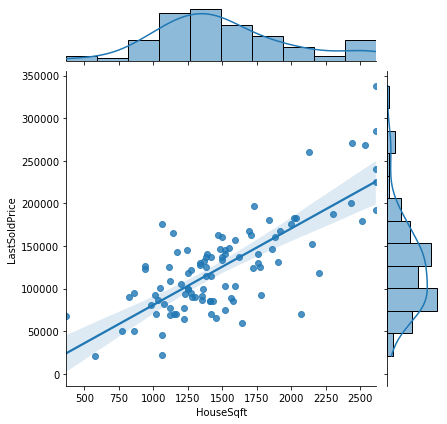

In [93]:
# Joinplot from seaborn library can be used to create a scatterplot

sns.jointplot(x=df.HouseSqft, y=df.LastSoldPrice, kind="reg")
plt.xlabel('HouseSqft')
plt.ylabel('LastSoldPrice')
plt.show()

#### 8. Model: Pre-processing

Encoding technique converts categorical data into numerical data

![Encode](pics/Encode.png)

In [94]:
# Converting categorical variables into dummy variables (one-hot encoding)

df = pd.get_dummies(data=df, columns=["Bedrooms", "Bathrooms"], drop_first=True)
df

,HouseSqft,Taxes,LastSoldPrice,Bedrooms_2,Bedrooms_3,Bedrooms_4,Bedrooms_5,Bathrooms_1.5,Bathrooms_2.0,Bathrooms_2.5,Bathrooms_3.0
0,1240.0,1360.0,145000,0,1,0,0,0,1,0,0
1,370.0,1050.0,68000,0,0,0,0,0,0,0,0
2,1415.0,1010.0,115000,0,1,0,0,1,0,0,0
3,1120.0,830.0,69000,0,1,0,0,0,1,0,0
4,1710.0,2150.0,163000,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95,1060.0,990.0,176000,1,0,0,0,0,1,0,0
96,1730.0,3030.0,196500,0,1,0,0,0,1,0,0
97,1370.0,1580.0,132200,0,1,0,0,0,1,0,0
98,1560.0,1770.0,88400,0,1,0,0,0,1,0,0


In [95]:
# Check for column names and other info

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HouseSqft      100 non-null    float64
 1   Taxes          100 non-null    float64
 2   LastSoldPrice  100 non-null    int64  
 3   Bedrooms_2     100 non-null    uint8  
 4   Bedrooms_3     100 non-null    uint8  
 5   Bedrooms_4     100 non-null    uint8  
 6   Bedrooms_5     100 non-null    uint8  
 7   Bathrooms_1.5  100 non-null    uint8  
 8   Bathrooms_2.0  100 non-null    uint8  
 9   Bathrooms_2.5  100 non-null    uint8  
 10  Bathrooms_3.0  100 non-null    uint8  
dtypes: float64(2), int64(1), uint8(8)
memory usage: 8.9 KB


#### 9. Model: Train/Test Split 

**Step1: Split dataset to X and Y variables**

In [96]:
# Separation of independent variables and dependent variable

x = df.loc[:, df.columns != "LastSoldPrice"]
y = df.loc[:, df.columns == "LastSoldPrice"]

In [97]:
# Exploring all independent variables

x.head()

,HouseSqft,Taxes,Bedrooms_2,Bedrooms_3,Bedrooms_4,Bedrooms_5,Bathrooms_1.5,Bathrooms_2.0,Bathrooms_2.5,Bathrooms_3.0
0,1240.0,1360.0,0,1,0,0,0,1,0,0
1,370.0,1050.0,0,0,0,0,0,0,0,0
2,1415.0,1010.0,0,1,0,0,1,0,0,0
3,1120.0,830.0,0,1,0,0,0,1,0,0
4,1710.0,2150.0,0,1,0,0,0,1,0,0


In [98]:
# Exploring the dependent variable

y.head()

,LastSoldPrice
0,145000
1,68000
2,115000
3,69000
4,163000


In [99]:
# Exploring the shape of x and y datasets - (no of rows, no of columns)

x.shape, y.shape

((100, 10), (100, 1))

**Step2: Performing 70:30 Data split**
- After Separating columns into dependent and independent variables (x, y), you split those into training-set and testing-set (70:30)


![split data](pics/traintestsplitdata1.png)

In [100]:
# Spliting data into train and test datasets --> 70:30 split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [101]:
# Exploring the dimensions of train datasets

x_train.shape, y_train.shape

((70, 10), (70, 1))

In [102]:
# Exploring the dimensions of test datasets

x_test.shape, y_test.shape

((30, 10), (30, 1))

#### 10. Model: Build (Train dataset)

In [103]:
# Using sklearn library to build a Linear Regression Model
# from sklearn.linear_model import LinearRegression --> this code imports the Linear Regression module


# Create a linear regression model using LinearRegression() module
model = LinearRegression()

In [104]:
# fitting the training data (70%) to the linear regression model
# this will generate the intercept and all the coefficients

model.fit(x_train, y_train)

LinearRegression()

#### 11. Model: Evaluation (Train dataset)

In [105]:
# Exploring the intercept

model.intercept_

array([16830.79672208])

In [106]:
# Exploring the coefficients

model.coef_

array([[ 3.34203557e+01,  3.69558778e+01,  3.54206461e+02,
         1.03187407e+03, -4.74417700e+03, -1.12292388e+05,
        -2.21140609e+04,  4.38508709e+03,  5.19274605e+03,
         3.86961989e+03]])

In [107]:
# As you can see the above coefficients and intercept are very poorly formatted
# the below is much better representation of "intercept" in a dataframe layout

pd.DataFrame(np.array(model.intercept_), index=["Intercept"], columns=["Intercept"])

,Intercept
Intercept,16830.796722


In [108]:
# As you can see the above coefficients and intercept are very poorly formatted
# the below is much better representation of "coefficients" in a dataframe layout

pd.DataFrame(np.array(model.coef_).T, index=x.columns, columns=["Coefficients"])

,Coefficients
HouseSqft,33.420356
Taxes,36.955878
Bedrooms_2,354.206461
Bedrooms_3,1031.874067
Bedrooms_4,-4744.176995
Bedrooms_5,-112292.388146
Bathrooms_1.5,-22114.060942
Bathrooms_2.0,4385.087091
Bathrooms_2.5,5192.746049
Bathrooms_3.0,3869.619891


#### 12. Model: Evaluation (Test dataset)

In [109]:
# Appling the linear regression model to make prediction on testing dataset(30%)

y_pred = model.predict(x_test)
y_pred

array([[ 86919.84014361],
       [125546.73571361],
       [175007.6727096 ],
       [125279.90051298],
       [159009.13078949],
       [ 54027.36536926],
       [ 54983.37610623],
       [137157.14319307],
       [ 93543.28899918],
       [260373.5813559 ],
       [ 78787.80348578],
       [135767.22363218],
       [ 55975.9605192 ],
       [169098.07434971],
       [ 80240.77153718],
       [185369.87624811],
       [128022.49586474],
       [ 94911.73068253],
       [ 37307.92703524],
       [ 86302.79481856],
       [ 80363.84970282],
       [163309.09941137],
       [126423.93206759],
       [144394.53674194],
       [121160.05008208],
       [118899.46860712],
       [185066.49641136],
       [195630.8050185 ],
       [106571.24740556],
       [140502.52084723]])

In [110]:
# Evaluating the above predicted results (model performance)

print("Root Mean squared error (RMSE):{}".format(math.sqrt(mean_squared_error(y_test, y_pred))))
print("Coefficient of determination (R^2):{}".format(r2_score(y_test, y_pred)))

Root Mean squared error (RMSE):25863.56132538107
Coefficient of determination (R^2):0.7367572311436212


#### 13. Model: Predictions

In [111]:
# Predicting on new data

# Reading data from a CSV file and saving that data as a dataframe
dfp = pd.read_csv("HousePricesPredict.csv")

# Viewing records
dfp

,HouseSqft,Taxes,Bedrooms,Bathrooms
0,1300,1400,3,2.0
1,350,1000,1,1.0
2,1900,1800,3,1.5
3,1300,900,3,2.0
4,1750,2100,3,2.0
5,770,590,2,1.0
6,2790,3680,4,2.5
7,2200,3690,5,3.0


In [112]:
# This method prints out information about a dataFrame including the index, dtype, columns, non-null values and memory usage
# This method is also useful for finding out missing values in a dataset
# if found, we can use interpolation techniques to rectify those missing values

dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   HouseSqft  8 non-null      int64  
 1   Taxes      8 non-null      int64  
 2   Bedrooms   8 non-null      int64  
 3   Bathrooms  8 non-null      float64
dtypes: float64(1), int64(3)
memory usage: 384.0 bytes


In [113]:
# Converting data type of a column using astype() method

dfp["HouseSqft"] = dfp.HouseSqft.astype("float64")
dfp["Taxes"] = dfp.Taxes.astype("float64")
dfp["Bedrooms"] = dfp.Bedrooms.astype("category")
dfp["Bathrooms"] = dfp.Bathrooms.astype("category")
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   HouseSqft  8 non-null      float64 
 1   Taxes      8 non-null      float64 
 2   Bedrooms   8 non-null      category
 3   Bathrooms  8 non-null      category
dtypes: category(2), float64(2)
memory usage: 672.0 bytes


In [114]:
# Let’s remove all the duplicates from the dataset

dfp = dfp.drop_duplicates()

In [115]:
# Let’s remove all the null values from the dataset

dfp = dfp.dropna()

In [116]:
# Let’s convert categorical variables into dummy variables (one-hot encoding)

dfp2 = pd.get_dummies(data=dfp,columns=["Bedrooms", "Bathrooms"], drop_first=True)
dfp2

,HouseSqft,Taxes,Bedrooms_2,Bedrooms_3,Bedrooms_4,Bedrooms_5,Bathrooms_1.5,Bathrooms_2.0,Bathrooms_2.5,Bathrooms_3.0
0,1300.0,1400.0,0,1,0,0,0,1,0,0
1,350.0,1000.0,0,0,0,0,0,0,0,0
2,1900.0,1800.0,0,1,0,0,1,0,0,0
3,1300.0,900.0,0,1,0,0,0,1,0,0
4,1750.0,2100.0,0,1,0,0,0,1,0,0
5,770.0,590.0,1,0,0,0,0,0,0,0
6,2790.0,3680.0,0,0,1,0,0,0,1,0
7,2200.0,3690.0,0,0,0,1,0,0,0,1


In [117]:
# Looking at the structure of the Dataframe

dfp2.shape

(8, 10)

In [118]:
# This method prints out information about a dataFrame including the index, dtype, columns, non-null values and memory usage

dfp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HouseSqft      8 non-null      float64
 1   Taxes          8 non-null      float64
 2   Bedrooms_2     8 non-null      uint8  
 3   Bedrooms_3     8 non-null      uint8  
 4   Bedrooms_4     8 non-null      uint8  
 5   Bedrooms_5     8 non-null      uint8  
 6   Bathrooms_1.5  8 non-null      uint8  
 7   Bathrooms_2.0  8 non-null      uint8  
 8   Bathrooms_2.5  8 non-null      uint8  
 9   Bathrooms_3.0  8 non-null      uint8  
dtypes: float64(2), uint8(8)
memory usage: 256.0 bytes


In [119]:
# Making new predictions using the "model" that was created in the earlier section

newhouseprices = model.predict(dfp2)
newhouseprices

array([[117432.44916831],
       [ 65483.79899703],
       [125767.86565997],
       [ 98954.51027539],
       [158340.72367583],
       [ 64722.64495297],
       [246519.78838416],
       [118300.        ]])

In [120]:
# Converting predicted results into a dataframe ("dfr")

dfr = pd.DataFrame(newhouseprices, columns=["newhouseprices"])
dfr

,newhouseprices
0,117432.449168
1,65483.798997
2,125767.865660
3,98954.510275
4,158340.723676
5,64722.644953
6,246519.788384
7,118300.000000


In [121]:
# Attaching predicted prices to the original dataset, and save as a new dataframe ("newdf")

newdf = pd.DataFrame.join(dfp,dfr)
newdf

,HouseSqft,Taxes,Bedrooms,Bathrooms,newhouseprices
0,1300.0,1400.0,3,2.0,117432.449168
1,350.0,1000.0,1,1.0,65483.798997
2,1900.0,1800.0,3,1.5,125767.865660
3,1300.0,900.0,3,2.0,98954.510275
4,1750.0,2100.0,3,2.0,158340.723676
5,770.0,590.0,2,1.0,64722.644953
6,2790.0,3680.0,4,2.5,246519.788384
7,2200.0,3690.0,5,3.0,118300.000000


#### 14. Model: Save Predictions

In [122]:
# Save the above dataframe ("newdf") as a CSV file

newdf.to_csv("NewHousePricesPredicted.csv")